## **酒店预订需求数据**##

**该数据集包含了两家酒店的预订信息，一家城市酒店及一家度假酒店，根据背景资料，两家酒店均位于葡萄牙。数据的时间跨度从2015年7月1日至2017年8月31日，数据中还包含了诸如预订的时间，停留时间，成人，儿童和/或婴儿的数量以及可用停车位的数量等信息。**

**问题定义**  
- 基本情况分析  
   - 两种酒店的总预订需求及入住率 
   - 入住客户的国家分类统计  
- 用户行为分析  
   - 提前预订时长  
   - 入住时间  
   - 入住时长  
   - 餐食预定情况  
   - 客户的预订渠道  
- 销售经营分析  
  - 两酒店总销售额比较   
  - 两酒店全年月均销售额比较  
  - 两酒店全年人均每晚房价比较    
- 预订取消的影响因素   
  - 各因素间的相关性分析  
  - 取消与否与lead time长短的关系  
  - 不同的押金状态与订单最终是否取消的关系

## 数据探索 ##
- 缺失值检查
- 异常值检查
- 数据整理

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
#忽略警告
import warnings
warnings.filterwarnings('ignore')
#使中文字体正常显示
plt.rcParams['font.sans-serif']='SimHei'
#正常显示负数
plt.rcParams['axes.unicode_minus']=False
pd.set_option("display.max_columns", 36)
%matplotlib inline

data=pd.read_csv('hotel_bookings.csv')

In [2]:
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


共计有32列字段

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [4]:
data.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

children、country、agent、company四个字段存在缺失值  
处理思路：  
children:为空值很可能意味着没有children，考虑用0来填充  
country：选取用众数来填充  
agent:缺失值猜测是因为非机构预订客户，为个人客户，用0填充  
company:缺失值较多，且信息较杂，考虑删除该列  

In [5]:
data['children']=data['children'].fillna(0)
data['agent']=data['agent'].fillna(0)
data.drop('company', axis=1, inplace=True)
data['country']=data['country'].fillna(data['country'].mode().index[0])

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 31 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119390 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

异常值处理：
-  在数据解释中，meal字段下，“SC”和“Undefined”实际为同一类别
-  在后续处理中，发现存在adults+children+babies总人数为0的异常情况，将该种情况的数据删除

In [7]:
data['meal'].unique()

array(['BB', 'FB', 'HB', 'SC', 'Undefined'], dtype=object)

In [8]:
data['meal'].replace('Undefined','SC',inplace=True)

zero_guest=data[data['adults']+data['children']+data['babies']==0].index
data.drop(zero_guest,inplace=True)

## 数据可视化

**本报告中前部分分析采用的是未取消订单，即排除了被取消的预定需求**

## 1、酒店基本情况分析

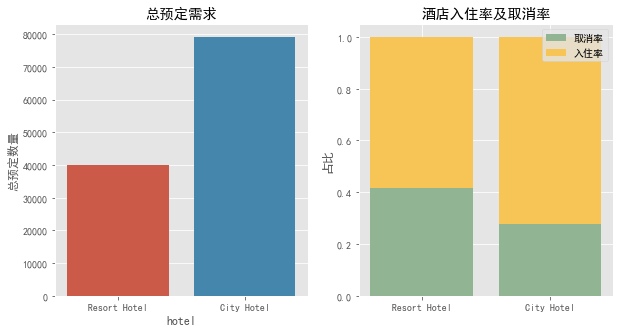

In [9]:
nocancel_data=data.loc[data['is_canceled']==0]
cancel_data=data.loc[data['is_canceled']==1]
nocancel_percent=list(nocancel_data['hotel'].value_counts()/data['hotel'].value_counts())
cancel_percent=list(cancel_data['hotel'].value_counts()/data['hotel'].value_counts())


fig,axes=plt.subplots(1,2,figsize=(10,5))
ax1=sns.countplot(x='hotel',data=data,ax=axes[0])
ax2=plt.bar([1,2],cancel_percent,tick_label=["Resort Hotel","City Hotel"],color="#91B493",label="取消率")
ax2=plt.bar([1,2],nocancel_percent,bottom=cancel_percent,color="#F6C555",label="入住率")
ax1.set_title('总预定需求')
ax1.set_ylabel('总预定数量')
plt.title('酒店入住率及取消率')
plt.ylabel('占比')
plt.legend()

- 城市酒店的总体预定量远高于度假酒店，差不多是度假酒店的两倍  
- 从取消订单数来看，城市酒店的预定需求取消率也低于度假酒店  
这可能与两家酒店的地理位置及所承担的入住功能不同有关

Text(0, 0.5, '预定量')

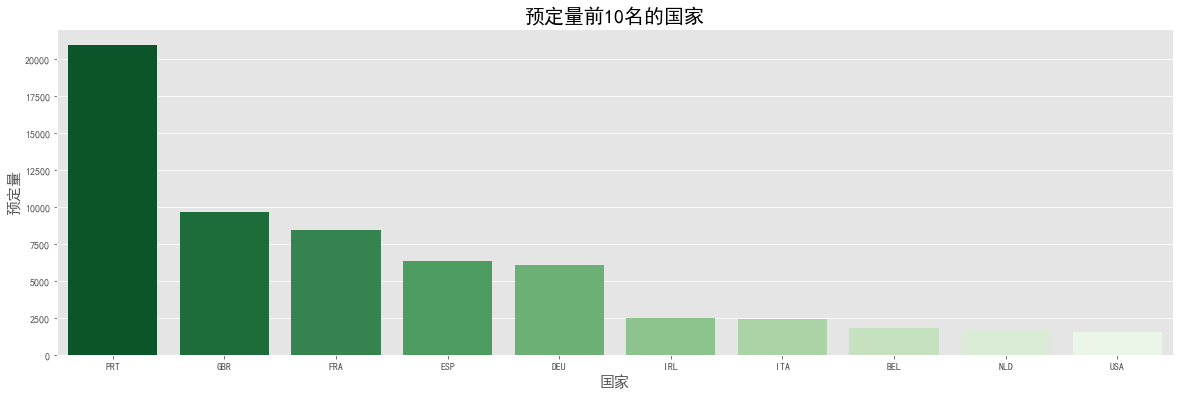

In [10]:
plt.figure(figsize=(20,6))
sns.countplot(x='country',data=nocancel_data,order=nocancel_data['country'].value_counts().iloc[:10].index,palette='Greens_r')
plt.title('预定量前10名的国家',fontsize=20)
plt.xlabel('国家',fontsize=15)
plt.ylabel('预定量',fontsize=15)

In [11]:
nocancel_data['country'].value_counts().iloc[:10]/nocancel_data['country'].value_counts().sum()

PRT    0.279652
GBR    0.128888
FRA    0.112890
ESP    0.085094
DEU    0.080881
IRL    0.033888
ITA    0.032369
BEL    0.024903
NLD    0.022877
USA    0.021224
Name: country, dtype: float64

- 在所有未取消预订客户中，葡萄牙本国的预定量最多，达到总预定量的28%  
- 其后依次是英国，法国、西班牙、德国，前5名均为欧洲国家

## 2、用户行为分析

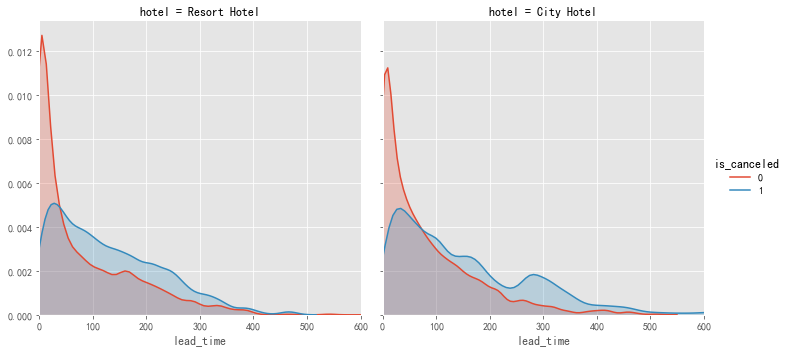

In [12]:
ax=sns.FacetGrid(data,col='hotel',hue='is_canceled',height=5,xlim=(0,600))
ax.map(sns.kdeplot,'lead_time',shade = True)
ax.add_legend()

两酒店关于提前预订时长以及最终订单是否被取消的关系中表现趋于一致
- 当提前预订时间较短时（<50天），客户更倾向于不取消订单
- 当提前预定时间大于某一值时（50—100)天，客户取消订单的概率更大

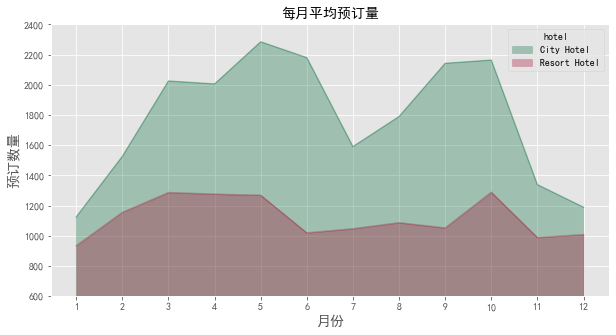

In [13]:
month_data=nocancel_data.pivot_table(index='arrival_date_month',columns='hotel',values='is_canceled',aggfunc='count')

month_data.index=month_data.index.map({'January':1,'February':2,'March':3,'April':4,'May':5,
                                       'June':6,'July':7,'August':8,'September':9,'October':10,'November':11,'December':12})
month_data=month_data.sort_index()

#因为要取两年中每月入住客户的平均值，两年中7月和8月共被记录了3次，其余月份被记录了2次
month_data.loc[(month_data.index==7)|(month_data.index==8)]/=3
month_data.loc[~((month_data.index==7)|(month_data.index==8))]/=2

month_data.plot.area(stacked=False,alpha=0.3,colormap='RdYlGn_r',figsize=(10, 5),ylim=(600,2400))
plt.title('每月平均预订量', fontsize=14)
plt.xlabel('月份', fontsize=14)
plt.xticks([i for i in month_data.index])
plt.ylabel('预订数量', fontsize=14)
plt.show()

- 城市酒店全年有两个入住高峰期，5-6月以及9-10月，7月预定量出现明显下降，12-1月入住量全年最低
- 度假酒店各月份预定量均小于城市酒店，度假酒店10月及3-5月为全年入住高峰期，全年预定量波动幅度较小

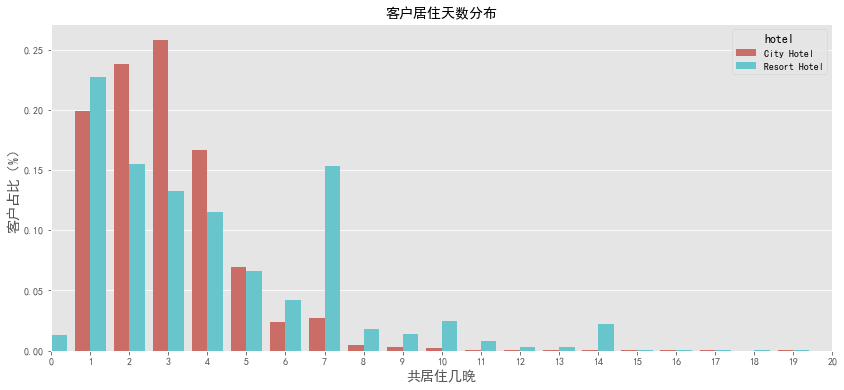

In [14]:
#总居住天数=工作日居住天数+周末居住天数
nocancel_data['total_nights']=nocancel_data['stays_in_weekend_nights']+nocancel_data['stays_in_week_nights']

nights_data=nocancel_data.groupby(['total_nights','hotel'],as_index=False).agg({'is_canceled':'count'})
#将数据拆成City Hotel和Resort Hotel
city_nights_data=nights_data.loc[nights_data['hotel']=='City Hotel']
Resort_nights_data=nights_data.loc[nights_data['hotel']=='Resort Hotel']
#因为两类酒店的总预订数不同，计算居住天数的占比数更方便进行比较
city_nights_data['number %']=city_nights_data['is_canceled']/city_nights_data['is_canceled'].sum()
Resort_nights_data['number %']=Resort_nights_data['is_canceled']/Resort_nights_data['is_canceled'].sum()

nights_data = pd.concat([city_nights_data, Resort_nights_data], ignore_index=True)


plt.figure(figsize=(14, 6))
sns.barplot(x = 'total_nights', y = 'number %', hue='hotel', data=nights_data,palette='hls')
plt.xlim(0,20)
plt.title('客户居住天数分布', fontsize=14)
plt.xlabel('共居住几晚', fontsize=14)
plt.ylabel('客户占比（%）', fontsize=14)
plt.show()

- 城市酒店绝大部分订单的居住天数在1-4天，居住超过7天的订单数量很少
- 度假酒店中有超过20%的客户居住天数在7天及以上，居住一天的客户占比最高超过20%
- 两者的差异猜测是因为度假酒店多数为度假客户，所以会有较多的居住超过7天的情况

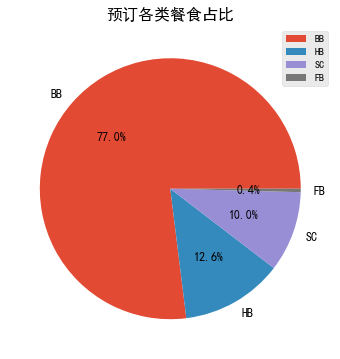

In [15]:
meal_data=nocancel_data['meal'].value_counts()

plt.figure(figsize=(14, 6))
plt.pie(meal_data,labels=meal_data.index,autopct="%.1f%%",textprops={'fontsize': 12})
plt.title('预订各类餐食占比',fontsize=16) #BB：仅早餐；HB：早餐+晚餐；FB：三餐；SC：无餐食预订
plt.legend()

Text(0, 0.5, '预定量')

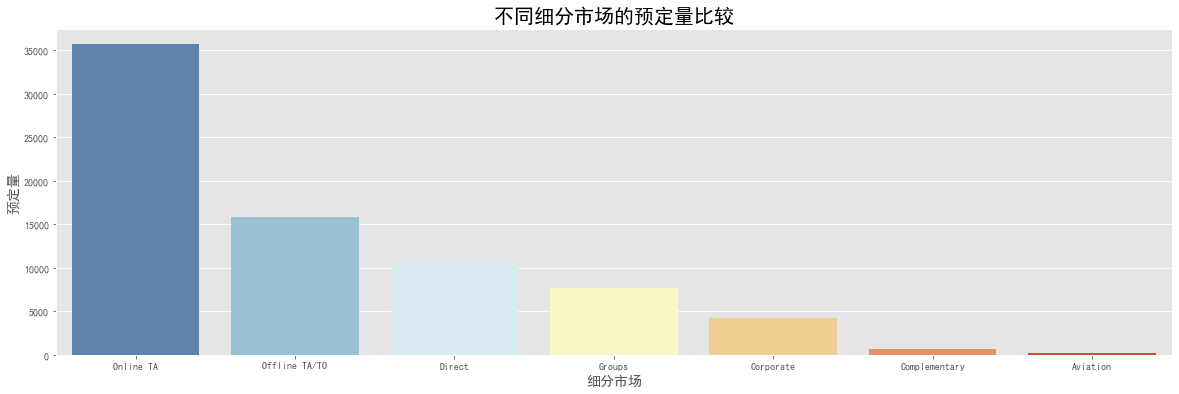

In [16]:
plt.figure(figsize=(20,6))
sns.countplot(x='market_segment',data=nocancel_data,order=nocancel_data['market_segment'].value_counts().index,palette='RdYlBu_r')
plt.title('不同细分市场的预定量比较',fontsize=20)
plt.xlabel('细分市场',fontsize=14)
plt.ylabel('预定量',fontsize=14)

- 从图中可以看出，通过网上预订方式的客户量最大，其次是通过线下的旅行社来预定，通过航空公司渠道预订的客户量最低

## 3、销售经营分析

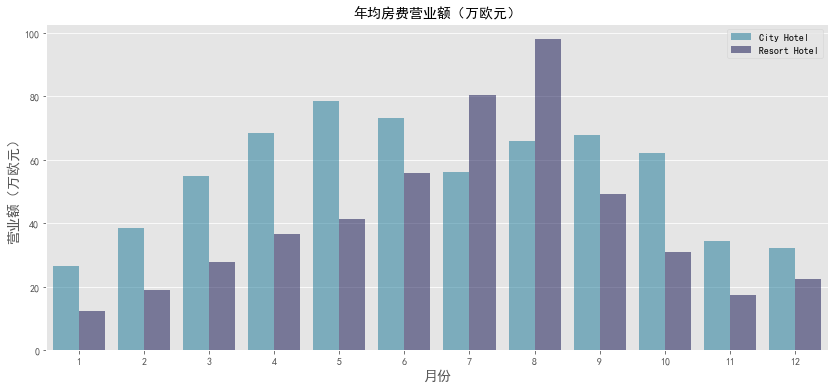

In [17]:
#Adr:每日平均住宿费，即所有住宿交易总额除以入住总天数
#每订单总房费=居住天数*每日平均住宿费（adr）
nocancel_data['total_price']=nocancel_data['total_nights']*nocancel_data['adr']
revenue_data=nocancel_data.groupby(['arrival_date_month','hotel'],as_index=False).agg({'total_price':'sum'})

#将月份替换成数字，方便后面x轴的正常排序展示
revenue_data['arrival_date_month']=revenue_data['arrival_date_month'].map({'January':1,'February':2,'March':3,'April':4,'May':5,'June':6,
                                                                 'July':7,'August':8,'September':9,'October':10,'November':11,'December':12})
revenue_data=revenue_data.sort_values('arrival_date_month')
#计算两酒店每年的房费总营收，由于7、8月被计算了3次，其他月份分别被计算了2次，所以要按照统一标准处理
revenue_data.loc[(revenue_data["arrival_date_month"] == 7) | (revenue_data["arrival_date_month"] == 8),"total_price"] /= 30000
revenue_data.loc[~((revenue_data["arrival_date_month"] == 7) | (revenue_data["arrival_date_month"] == 8)),"total_price"] /= 20000

plt.figure(figsize=(14, 6))
sns.barplot(data=revenue_data,x='arrival_date_month',y='total_price',hue='hotel',palette = 'ocean_r',alpha=0.5)
plt.title('年均房费营业额（万欧元）',fontsize=14)
plt.xlabel('月份', fontsize=14)
plt.ylabel('营业额（万欧元）',fontsize=14)
plt.legend()
plt.show()

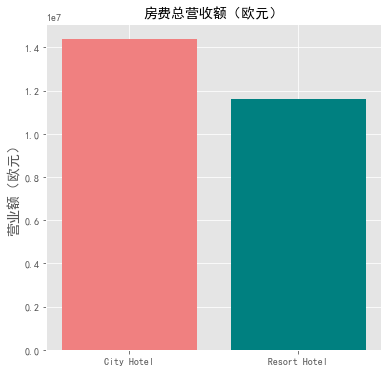

In [18]:
total_revenue_data=nocancel_data.pivot_table(index='hotel',values='total_price',aggfunc='sum')

plt.figure(figsize=(6,6))
plt.bar(data=total_revenue_data,x=total_revenue_data.index,height='total_price',color=['lightcoral','teal'])
plt.title('房费总营收额（欧元）',fontsize=14)
plt.ylabel('营业额（欧元）',fontsize=14)
plt.show()

- 在数据提供的统计时间段，两酒店的营业额差值约为200万欧元
- 城市酒店的全年房费营业额呈现双高峰，分别为4-6月以及8-10月
- 度假酒店的全年房费营业额7-8月最高，呈现明显的淡旺季

In [19]:
nocancel_data['adr_pp']=nocancel_data['adr']/(nocancel_data['adults']+nocancel_data['children'])

In [20]:
nocancel_data.groupby('hotel').agg({'adr_pp':'mean'})

,adr_pp
hotel,
City Hotel,59.272988
Resort Hotel,47.488866


- 城市酒店人均每晚59欧元，度假酒店人均每晚47欧元

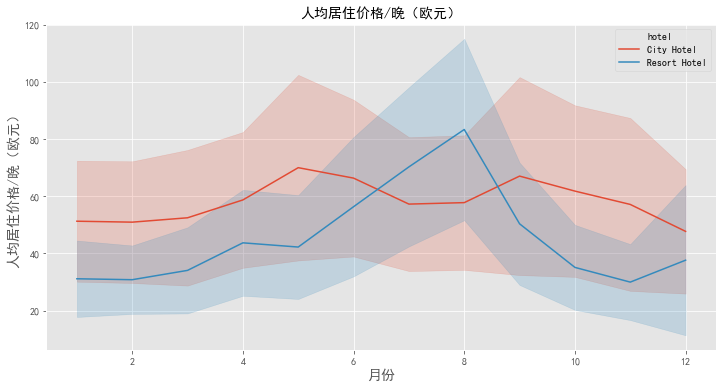

In [21]:
adr_pp_data=nocancel_data[['hotel', 'arrival_date_month', 'adr_pp']]
adr_pp_data['arrival_date_month']=adr_pp_data['arrival_date_month'].map({'January':1,'February':2,'March':3,'April':4,'May':5,'June':6,
                                                                 'July':7,'August':8,'September':9,'October':10,'November':11,'December':12})
adr_pp_data=adr_pp_data.sort_values('arrival_date_month')
adr_pp_data

plt.figure(figsize=(12, 6))
sns.lineplot(x = 'arrival_date_month', y='adr_pp', hue='hotel', data=adr_pp_data, ci='sd')
plt.title('人均居住价格/晚（欧元）', fontsize=14)
plt.xlabel('月份', fontsize=14)
plt.ylabel('人均居住价格/晚（欧元）', fontsize=14)
plt.legend()
plt.show()

- 城市酒店全年人均每晚价格波动较小，基本与全年预定量情况变化趋势一致
- 度假酒店人均每晚价格随月份波动较大，其中8月价格最高
- 全年最佳预订酒店时间：城市酒店12-2月，度假酒店1-2月

## 4、预订取消的影响因素

In [22]:
#将分类数据进行标签化处理，方便进行后续的相关性计算
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data_copy=data.copy()
data_copy['agent']= data_copy['agent'].astype(int)
data_copy['country']= data_copy['country'].astype(str)

data_copy['hotel'] = le.fit_transform(data_copy['hotel'])
data_copy['arrival_date_month'] = le.fit_transform(data_copy['arrival_date_month'])
data_copy['meal'] = le.fit_transform(data_copy['meal'])
data_copy['country'] = le.fit_transform(data_copy['country'])
data_copy['market_segment']= le.fit_transform(data_copy['market_segment'])
data_copy['distribution_channel']=le.fit_transform(data_copy['distribution_channel'])
data_copy['is_repeated_guest'] = le.fit_transform(data_copy['is_repeated_guest'])
data_copy['reserved_room_type'] = le.fit_transform(data_copy['reserved_room_type'])
data_copy['assigned_room_type'] = le.fit_transform(data_copy['assigned_room_type'])
data_copy['deposit_type'] = le.fit_transform(data_copy['deposit_type'])
data_copy['agent'] = le.fit_transform(data_copy['agent'])
data_copy['customer_type'] = le.fit_transform(data_copy['customer_type'])
data_copy['reservation_status'] = le.fit_transform(data_copy['reservation_status'])


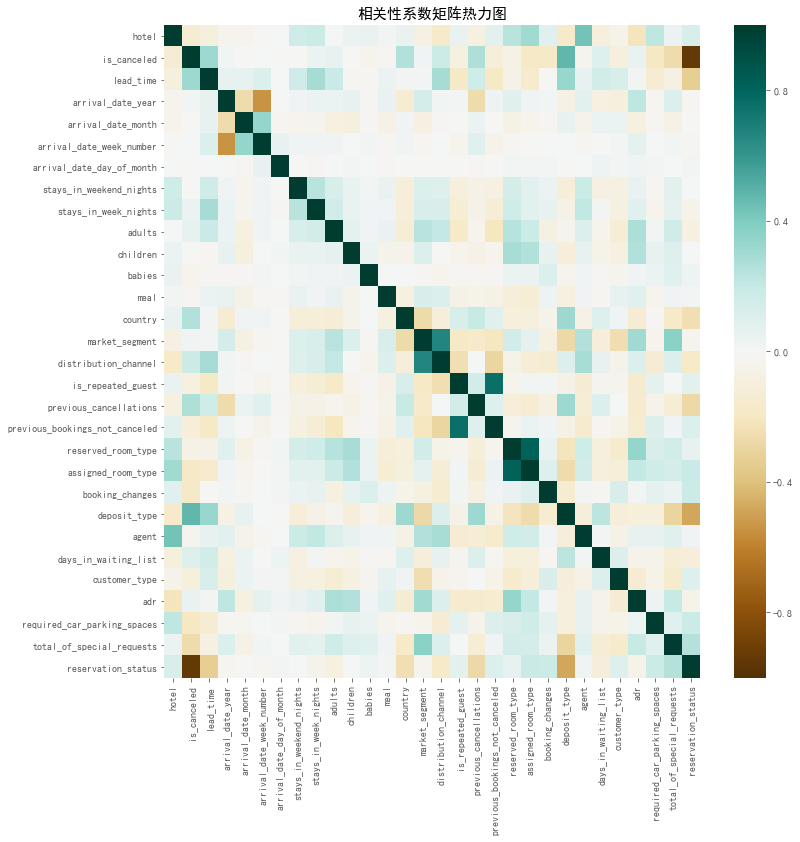

In [23]:
data_corr=data_copy.corr(method='spearman')

plt.figure(figsize=(12, 12))
sns.heatmap(data_corr,cmap='BrBG', vmin=-1, vmax=1)
plt.title('相关性系数矩阵热力图',size=15, weight='bold')
plt.show()

In [24]:
np.abs(data_corr['is_canceled']).sort_values(ascending=False)

is_canceled                       1.000000
reservation_status                0.942700
deposit_type                      0.477106
lead_time                         0.316448
previous_cancellations            0.270316
country                           0.264871
total_of_special_requests         0.258743
required_car_parking_spaces       0.197604
assigned_room_type                0.188025
booking_changes                   0.184299
distribution_channel              0.173747
hotel                             0.137082
previous_bookings_not_canceled    0.115395
customer_type                     0.099376
days_in_waiting_list              0.098417
is_repeated_guest                 0.083745
reserved_room_type                0.068031
adults                            0.065668
adr                               0.049927
stays_in_week_nights              0.041431
babies                            0.034390
market_segment                    0.026340
agent                             0.024745
arrival_dat

- 通过分析不同要素间的相关性发现，与订单取消有一定相关性的前三个因素为预付款方式，提前下单时间以及客户之前订单的取消次数（reservation_status该字段本身就表示了该订单是否被取消，故排除该项）

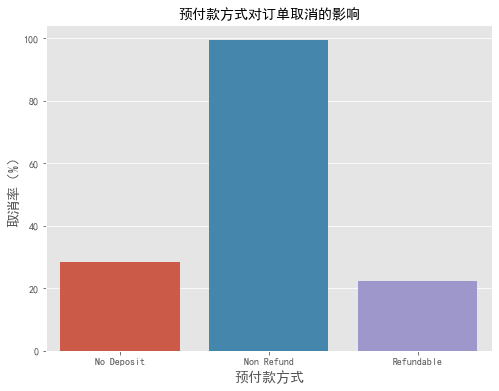

In [25]:
deposit_data = data.groupby('deposit_type')['is_canceled'].describe()

plt.figure(figsize=(8, 6))
sns.barplot(x=deposit_data.index, y=deposit_data['mean'] * 100)
plt.title('预付款方式对订单取消的影响', fontsize=14)
plt.xlabel('预付款方式', fontsize=14)
plt.ylabel('取消率（%）', fontsize=14)
plt.show()

No Deposit:无预付保证金  
Non Refund:房价全额提前预付，取消不退款  
Refundable:部分房价预付，取消可退款  
- 从图中发现，全额预付房费且不能退款的客户几乎100%取消了房间预订，这种现象与正常逻辑存在较大偏差，猜测可能是数据本身存在问题或标签类别有误

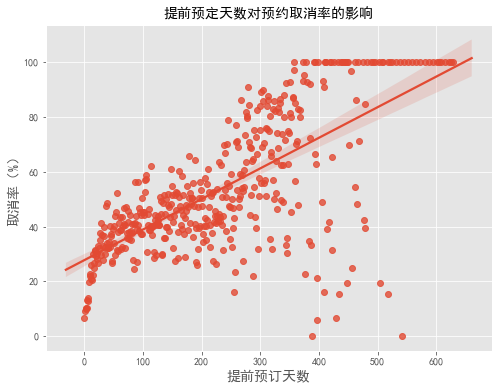

In [26]:
lead_data = data.groupby('lead_time')['is_canceled'].describe().reset_index()
lead_data = lead_data.loc[lead_data["count"] >= 10]

plt.figure(figsize=(8, 6))
sns.regplot(x=lead_data['lead_time'],y=lead_data['mean']*100, data=lead_data)
plt.title('提前预定天数对预约取消率的影响', fontsize=14)
plt.xlabel('提前预订天数', fontsize=14)
plt.ylabel('取消率（%）', fontsize=14)
plt.show()

- 从图中可知，提前预订天数越短，客户越趋向于不取消订单，而提前预订天数过大的情况下，取消率则很高，这与前面得出的结论一致

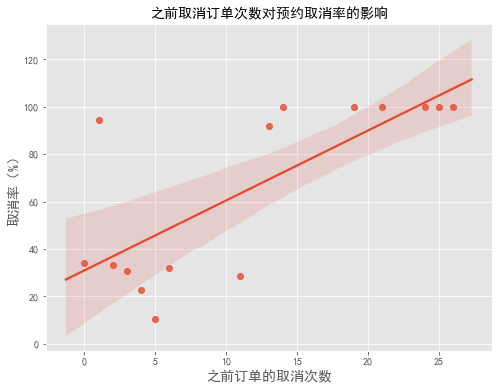

In [27]:
previous_cancellations_data=data.groupby('previous_cancellations')['is_canceled'].describe().reset_index()

plt.figure(figsize=(8, 6))
sns.regplot(x='previous_cancellations',y=previous_cancellations_data['mean']*100, data=previous_cancellations_data)
plt.title('之前取消订单次数对预约取消率的影响', fontsize=14)
plt.xlabel('之前订单的取消次数', fontsize=14)
plt.ylabel('取消率（%）', fontsize=14)
plt.show()

- 从图中可知，数据主要集中在两个区域范围内，之前取消次数较少的客户他们的预订取消率要明显低于之前取消次数较多的客户